## Análisis de bases de datos  

### <b>Taller 5: Análisis de componentes principales</b>  

Laura Nicole Bermudez Santa - labermudezs@unal.edu.co  
David Sebastián Mendoza Cruz - damendozac@unal.edu.co  
David Alejandro Alquichire Rincón - dalquichire@unal.edu.co  
Laura Nicole Bermudez Santa - labermudezs@unal.edu.co  
Juan David Bernal - jubernalv@unal.edu.co

En el Excel adjunto encontrarán una base de datos correspondiente a la composición nutricional de hamburguesas producidas por las siguientes empresas: Arby's, Burger King, Chick-fil-a, Dairy Queen, McDonald's y Sonic. La información de la composición nutricional de las hamburguesas contiene los siguientes atributos: 
- Calories 
- TotalFat_g (Grasa total en gramos).
- Sodium_mg (Sodio en miligramos).
- CaloriesFromFat (Calorías proveniente de grasas en gramos)
- SaturatedFat_g (Grasas saturadas en gramos)
- TransFat_g (Grasas trans en gramos)
- Cholesterol_mg (Colesterol en mili gramos)
- Carbohydrates_g (Carbohidratos en gramos)
- Fiber_g (Fibra en gramos)
- Sugars_g (Azúcar en gramos)
- Protein_g (Proteínas en gramos)


In [49]:
# Importamos algunas librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Leemos el archivo
Hamburguesas = pd.read_csv('Hamburguesas.csv')
Hamburguesas.head(5)

,Meat,Type,Sandwich,Calories,TotalFat_g,Sodium_mg,CaloriesFromFat,SaturatedFat_g,TransFat_g,Cholesterol_mg,Carbohydrates_g,Fiber_g,Sugars_g,Protein_g,Restaurant
0,Ham,Sandwich,Arby-Q Sandwich,400,10,1230,90,"3,0","0,0",30,58,3,23,18,Arby's
1,Ham,Crossover,Arby’s Melt,330,11,920,100,"4,0","0,0",30,40,2,5,18,Arby's
2,Beef,Crossover,Beef ‘n Cheddar Classic,440,18,1290,160,"5,0","1,0",45,47,2,9,23,Arby's
3,Beef,Crossover,Beef ‘n Cheddar Mid,530,23,1720,200,"7,0","1,0",80,48,2,9,34,Arby's
4,Beef,Burger,Jr Deluxe Sandwich,260,12,560,110,"3,0","0,0",30,26,2,4,13,Arby's


1. Mapa de calor para la matriz de correlación.

In [50]:
def Tabular_corr_matrix(corr_mat):
    '''
    Esta función presenta en forma tabular
    la correlación entre pares de columnas eliminando los
    pares iguales
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','correlación']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat = corr_mat.sort_values('correlación', ascending=False)

    return(corr_mat)

corr_matrix = Hamburguesas.select_dtypes(include=['number']).corr(method='pearson')
Tabular_corr_matrix(corr_matrix).head(8)

,variable_1,variable_2,correlación
28,CaloriesFromFat,TotalFat_g,0.999579
12,TotalFat_g,CaloriesFromFat,0.999579
3,Calories,CaloriesFromFat,0.944555
27,CaloriesFromFat,Calories,0.944555
9,TotalFat_g,Calories,0.942956
1,Calories,TotalFat_g,0.942956
76,Protein_g,Cholesterol_mg,0.904780
44,Cholesterol_mg,Protein_g,0.904780


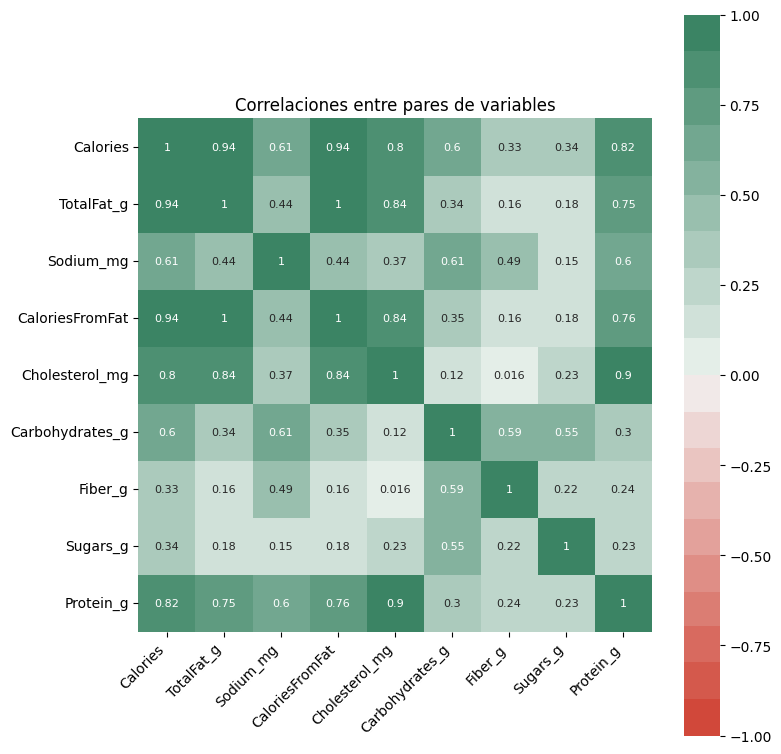

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

sb.heatmap(
    corr_matrix,
    annot=True,
    cbar=True,
    annot_kws={"size": 8},
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sb.diverging_palette(15, 150, n=20),
    square=True,
    ax=ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
)

ax.tick_params(labelsize=10)
ax.set_title("Correlaciones entre pares de variables")
plt.tight_layout()
plt.show()

2. Matriz de datos centralizados.

3. Cálculo de SVD para la matriz de covarianza.


4. Cálculo del porcentaje de participación de cada valor propio.

5. Determine cuál o cuáles atributos son los más representativos de los datos. Puede distinguirse un grupo de atributos que represente el 90% de los datos?

In [52]:
import numpy as np
import pandas as pd

X = Hamburguesas[['TotalFat_g','Sodium_mg',
                  'CaloriesFromFat', 'SaturatedFat_g',
                  'TransFat_g', 'Cholesterol_mg',
                  'Carbohydrates_g', 'Fiber_g',
                  'Sugars_g', 'Protein_g']].replace(',', '.', regex=True).astype(float).values

Y = Hamburguesas[['Calories']].replace(',', '.', regex=True).astype(float).values

# Generamos una columna de unos y la insertamos como primera columna de X
Unos = np.ones(len(Hamburguesas))
X = np.insert(X, 0, Unos, axis=1)  # Conversión correcta sin repetir la inserción

# Cálculo de la seudo-inversa de Moore-Penrose
MPenrouse = np.linalg.pinv(np.matmul(X.T, X))
C = np.matmul(MPenrouse, X.T)
B = np.matmul(C, Y)

print(B)


[[-1.96423167e+00]
 [ 5.03020697e+00]
 [-2.27096492e-03]
 [ 4.07366167e-01]
 [ 1.55951517e+00]
 [-2.29162723e+00]
 [-5.16515237e-02]
 [ 4.22613012e+00]
 [-1.74247698e+00]
 [-7.23286529e-01]
 [ 4.21705750e+00]]


Realizando un análisis multilineal, obtenemos los siguientes coeficientes:

$$
\beta_0 = -1.960, \quad \beta_1 = 5.030, \quad \beta_2 = -0.002, \quad \beta_3 = 0.407, \quad \beta_4 = 1.560,
$$
$$
\beta_5 = -2.292, \quad \beta_6 = -0.052, \quad \beta_7 = 4.226, \quad \beta_8 = -1.742, \quad \beta_9 = -0.723, \quad \beta_{10} = 4.217.
$$

Lo que nos lleva a concluir que los atributos más representativos son:
- TotalFat_g
- Carbohydrates_g
- Protein_g

In [53]:
import pandas as pd
import numpy as np

# Seleccionar solo columnas numéricas
DatosNumericos = Hamburguesas.select_dtypes(include='number')

# Calcular la media solo de columnas numéricas
media_numerica = DatosNumericos.mean()

# Restar la media a cada fila
Datos_centralizados = DatosNumericos.sub(media_numerica, axis=1)

# Seleccionar solo las columnas necesarias
columnas_seleccionadas = ['TotalFat_g', 'Sodium_mg', 'CaloriesFromFat', 'SaturatedFat_g',
                           'TransFat_g', 'Cholesterol_mg', 'Carbohydrates_g', 'Fiber_g',
                           'Sugars_g', 'Protein_g']

# Verificar si las columnas existen en Datos_centralizados
columnas_validas = [col for col in columnas_seleccionadas if col in Datos_centralizados.columns]

# Convertir a matriz NumPy
D = Datos_centralizados[columnas_validas].values

# Calcular la matriz de covarianza
C = np.matmul(D.T, D) / len(D)

# Descomposición en valores singulares (SVD)
U, S, V = np.linalg.svd(C, full_matrices=True)

# Imprimir resultados
print(U)
print(S)
print(V)


[[-1.65077417e-02  1.05613565e-01 -2.91862674e-02  1.33387805e-02
  -2.02337855e-02 -1.22224642e-02 -4.49571199e-02 -9.92453309e-01]
 [-9.87619003e-01 -1.55268014e-01  5.12385864e-03  2.02679286e-02
  -7.93328868e-03  6.94396381e-04 -2.24055684e-04  1.89288760e-04]
 [-1.48481593e-01  9.45843964e-01 -2.53667414e-01  7.63858633e-02
   9.06721228e-03  2.71991711e-02  1.45795143e-03  1.11023961e-01]
 [-3.95602686e-02  2.60294827e-01  9.01445940e-01 -2.23884205e-01
  -1.76798657e-01 -1.86302025e-01  4.44864803e-02  2.72246830e-03]
 [-2.18640509e-02  5.18275555e-03 -2.72041529e-01 -9.24774017e-01
   6.03877949e-02 -2.56762582e-01 -2.66021319e-02 -3.77682606e-04]
 [-1.81634067e-03 -1.23006545e-03 -1.75073458e-02 -4.00700345e-02
   1.15168399e-01  8.78648657e-02  9.87303541e-01 -4.82783223e-02]
 [-1.45560522e-03  4.35019699e-03  7.46455739e-03 -2.63151279e-01
  -4.98465160e-01  8.25547227e-01 -2.59712398e-02 -2.09712973e-03]
 [-1.55224251e-02  4.81260787e-02  2.18634735e-01 -1.31875564e-01
   

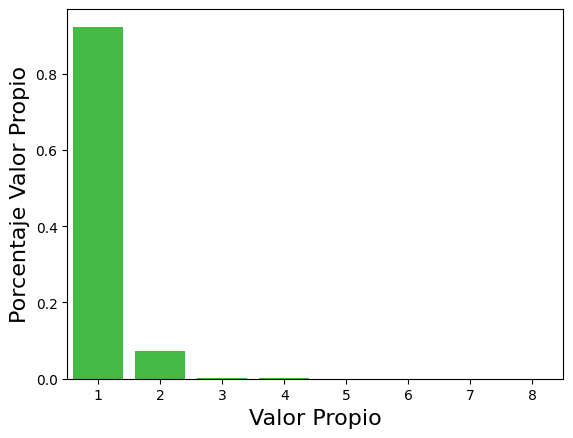

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
Porcentaje_Valor_Propio = np.round(S/np.sum(S), decimals=3)
Porcentaje_Valor_Propio

sns.barplot(x=list(range(1,len(Porcentaje_Valor_Propio)+1)),
            y=Porcentaje_Valor_Propio, color="limegreen")
plt.xlabel('Valor Propio', fontsize=16)
plt.ylabel('Porcentaje Valor Propio', fontsize=16)
plt.savefig('svd_scree_plot.png',dpi=100)

In [55]:
u1 = U[:, 0]
u1_abs = np.abs(u1)
participacion_porcentual = (u1_abs / np.sum(u1_abs)) * 100

print(U.shape)  # Debe ser (n_variables, n_variables)
print(len(DatosNumericos.columns))  # Verifica el número de columnas
DatosNumericos = DatosNumericos[columnas_validas]  # Solo mantener columnas en D


pr = pd.DataFrame(participacion_porcentual,DatosNumericos.columns)
pr

(8, 8)
9


,0
TotalFat_g,1.339015
Sodium_mg,80.110103
CaloriesFromFat,12.043992
Cholesterol_mg,3.208907
Carbohydrates_g,1.773489
Fiber_g,0.147331
Sugars_g,0.118071
Protein_g,1.259092


Está claro que el conjunto de atributos $\{Sodium\_mg, CaloriesFromFat\}$ es el mínimo que representa al menos el 90% de los datos, de hecho, representa el:

$$ 92.154095 $$

6. Si es posible, clasifique los atributos en orden de importancia, según participen con mayor proporción en la representación de los datos.

In [63]:
pr = pd.DataFrame(participacion_porcentual, index=DatosNumericos.columns, columns=['Participación (%)'])
pr_sorted = pr.sort_values(by='Participación (%)')  # Orden ascendente
print(pr_sorted)


                 Participación (%)
Sugars_g                  0.118071
Fiber_g                   0.147331
Protein_g                 1.259092
TotalFat_g                1.339015
Carbohydrates_g           1.773489
Cholesterol_mg            3.208907
CaloriesFromFat          12.043992
Sodium_mg                80.110103


7. Determine si los datos determinan de alguna manera la empresa de donde provienen las hamburguesas.

8. Haga un gráfico tridimensional de los datos usando:
- Los tres atributos más representativos.
- Las tres componentes más representativas asociadas a los tres valores propios más representativos.